<h1><center style="color:#FFFF00; font-family:bold;">Prediction Product AD Campaign Performance</center></h1>

***

# Introduction

This notebook explores the **Prediction Product AD Campaign Performance**, aiming to uncover valuable insights into the effectiveness of various marketing campaigns. The dataset contains extensive information about campaign types, target audiences, channels used, conversion rates, acquisition costs, ROI, locations, languages, clicks, impressions, engagement scores, customer segments, and dates.

Understanding and analyzing these metrics can provide marketers and data analysts with crucial information to optimize marketing strategies, allocate budgets effectively, and enhance campaign performance. By leveraging data-driven insights, businesses can tailor their approaches to engage their target audiences more effectively and achieve higher returns on their marketing investments.

In this exploration, we will delve into exploratory data analysis (EDA), visualize key metrics, conduct correlation analyses, and build predictive models to extract actionable insights. By the end, we aim to empower stakeholders with the knowledge needed to make informed decisions that drive growth and success in their marketing campaigns.

# 📚 Importing Libraries & Data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("products_campaign_sales.csv")
print("Number of datapoints:", len(df))

Number of datapoints: 731


# 🔢 Basic Analysis 

In [4]:
df.head()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416
3,0,3,1,2,1,0.12,141.0,0.82,95,2273,2368
4,0,0,0,1,1,0.10,146.0,0.59,73,1456,1529


In [5]:
df.tail()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
726,0,5,1,1,8,0.79,149.0,0.83,829,4634,5463
727,0,5,1,1,8,0.79,154.0,0.83,670,3176,3846
728,0,5,1,1,8,0.84,158.0,0.87,562,2825,3387
729,0,6,0,1,8,0.80,150.0,0.87,987,2298,3285
730,0,6,0,1,9,0.80,149.0,0.84,1448,3392,4840


From the given dataframe above, looks like the data doesn't need further cleaning.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   limit_infor      731 non-null    int64  
 1   campaign_type    731 non-null    int64  
 2   campaign_level   731 non-null    int64  
 3   product_level    731 non-null    int64  
 4   resource_amount  731 non-null    int64  
 5   email_rate       731 non-null    float64
 6   price            729 non-null    float64
 7   discount_rate    731 non-null    float64
 8   hour_resouces    731 non-null    int64  
 9   campaign_fee     731 non-null    int64  
 10  orders           731 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


From the data above, we can observe the following:
 - There are no missing values
 - There are 16 columns and 200000 rows
 - There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.

# 🛠️ Data Preprocessing

In [7]:
df.head()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416
3,0,3,1,2,1,0.12,141.0,0.82,95,2273,2368
4,0,0,0,1,1,0.10,146.0,0.59,73,1456,1529


In [10]:
# Check for any missing values
df.isnull().sum()

limit_infor        0
campaign_type      0
campaign_level     0
product_level      0
resource_amount    0
email_rate         0
price              2
discount_rate      0
hour_resouces      0
campaign_fee       0
orders             0
dtype: int64

In [11]:
# Summary statistics
df.describe()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,729.000000,731.000000,731.000000,731.000000,731.000000
mean,0.042408,2.997264,0.683995,1.395349,4.952120,0.474337,162.812071,0.809617,848.176471,3696.391245,4531.079343
std,0.404911,2.004787,0.465233,0.544894,1.838449,0.162913,14.267136,0.077679,686.622488,1908.643139,1932.532346
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.080000,100.000000,0.490000,2.000000,20.000000,22.000000
25%,0.000000,1.000000,0.000000,1.000000,3.000000,0.340000,152.000000,0.770000,315.500000,2497.000000,3199.000000
50%,0.000000,3.000000,1.000000,1.000000,5.000000,0.490000,163.000000,0.820000,713.000000,3662.000000,4563.000000
75%,0.000000,5.000000,1.000000,2.000000,7.000000,0.610000,173.000000,0.870000,1096.000000,4795.500000,6011.500000
max,10.000000,6.000000,1.000000,3.000000,9.000000,0.840000,197.000000,0.980000,3410.000000,33380.000000,8714.000000


In [14]:
# Convert specific columns to categorical dtype
to_convert = ['limit_infor', 'campaign_type', 'campaign_level', 'product_level']

In [15]:
for col in to_convert:
    df[col] = df[col].astype('category')

In [16]:
# Display the updated data types to confirm conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   limit_infor      731 non-null    category
 1   campaign_type    731 non-null    category
 2   campaign_level   731 non-null    category
 3   product_level    731 non-null    category
 4   resource_amount  731 non-null    int64   
 5   email_rate       731 non-null    float64 
 6   price            729 non-null    float64 
 7   discount_rate    731 non-null    float64 
 8   hour_resouces    731 non-null    int64   
 9   campaign_fee     731 non-null    int64   
 10  orders           731 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 43.7 KB


In [17]:

# Confirm the first few rows of the processed dataset
df.head()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416
3,0,3,1,2,1,0.12,141.0,0.82,95,2273,2368
4,0,0,0,1,1,0.10,146.0,0.59,73,1456,1529


In [18]:
# Display the number of unique values for each column
unique_values = df.nunique()
print("Number of unique values for each column:\n", unique_values)

# Display the unique values for each column
for column in df.columns:
    unique_vals = df[column].unique()
    print(f"\nUnique values in '{column}':")
    print(unique_vals)

Number of unique values for each column:
 limit_infor          3
campaign_type        7
campaign_level       2
product_level        3
resource_amount      9
email_rate          71
price               72
discount_rate       42
hour_resouces      606
campaign_fee       679
orders             695
dtype: int64

Unique values in 'limit_infor':
[0, 1, 10]
Categories (3, int64): [0, 1, 10]

Unique values in 'campaign_type':
[6, 0, 1, 3, 4, 2, 5]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

Unique values in 'campaign_level':
[0, 1]
Categories (2, int64): [0, 1]

Unique values in 'product_level':
[1, 2, 3]
Categories (3, int64): [1, 2, 3]

Unique values in 'resource_amount':
[1 2 3 4 5 6 7 8 9]

Unique values in 'email_rate':
[0.08 0.1  0.12 0.14 0.15 0.13 0.19 0.16 0.17 0.18 0.21 0.23 0.22 0.2
 0.25 0.24 0.26 0.27 0.28 0.3  0.29 0.32 0.31 0.34 0.33 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   limit_infor      731 non-null    category
 1   campaign_type    731 non-null    category
 2   campaign_level   731 non-null    category
 3   product_level    731 non-null    category
 4   resource_amount  731 non-null    int64   
 5   email_rate       731 non-null    float64 
 6   price            729 non-null    float64 
 7   discount_rate    731 non-null    float64 
 8   hour_resouces    731 non-null    int64   
 9   campaign_fee     731 non-null    int64   
 10  orders           731 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 43.7 KB


# 🔎 Exploratory Data Analysis 📊

Let's perform some exploratory data analysis (EDA) and create visualizations for the given dataset. 

In [20]:
df.head()

,limit_infor,campaign_type,campaign_level,product_level,resource_amount,email_rate,price,discount_rate,hour_resouces,campaign_fee,orders
0,0,6,0,1,1,0.08,140.0,0.83,93,888,1981
1,0,0,0,1,1,0.10,144.0,0.75,150,836,986
2,0,1,1,1,1,0.12,149.0,0.84,86,1330,1416
3,0,3,1,2,1,0.12,141.0,0.82,95,2273,2368
4,0,0,0,1,1,0.10,146.0,0.59,73,1456,1529


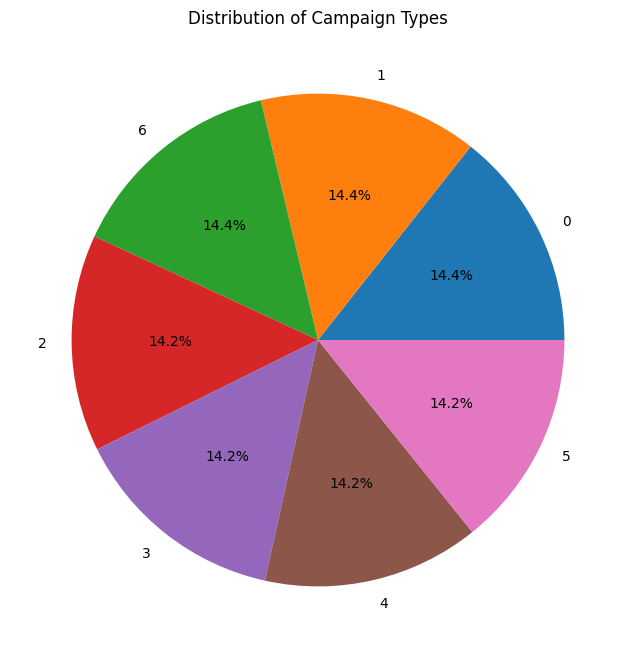

In [22]:
# Count the occurrences of each campaign type
campaign_type_counts = df['campaign_type'].value_counts()

# Create a pie chart to visualize the distribution of campaign types
plt.figure(figsize=(8, 8))
plt.pie(campaign_type_counts, labels=campaign_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Campaign Types')
plt.show()

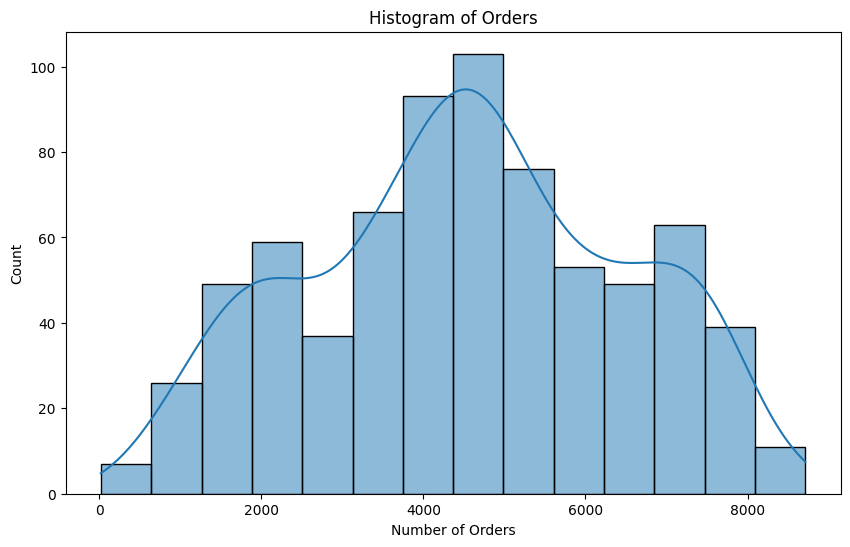

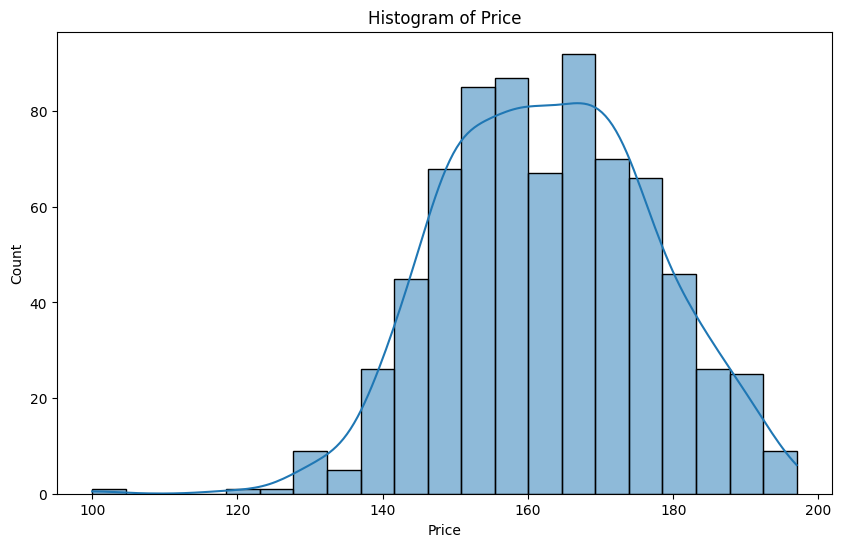

In [24]:
# Histogram of Orders
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='orders', kde=True)
plt.title('Histogram of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Count')
plt.show()

# Histogram of Price
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price', kde=True)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


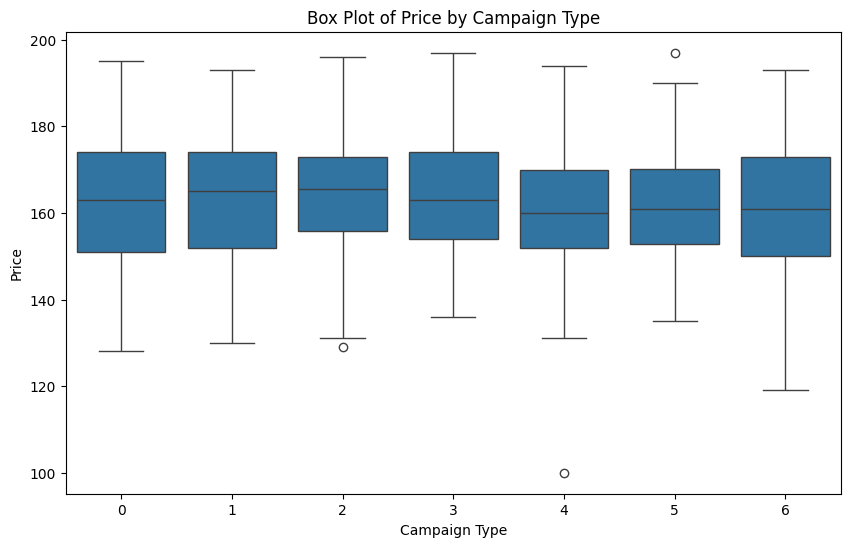

In [25]:
# Box plot of Price by Campaign Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='campaign_type', y='price')
plt.title('Box Plot of Price by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Price')
plt.show()

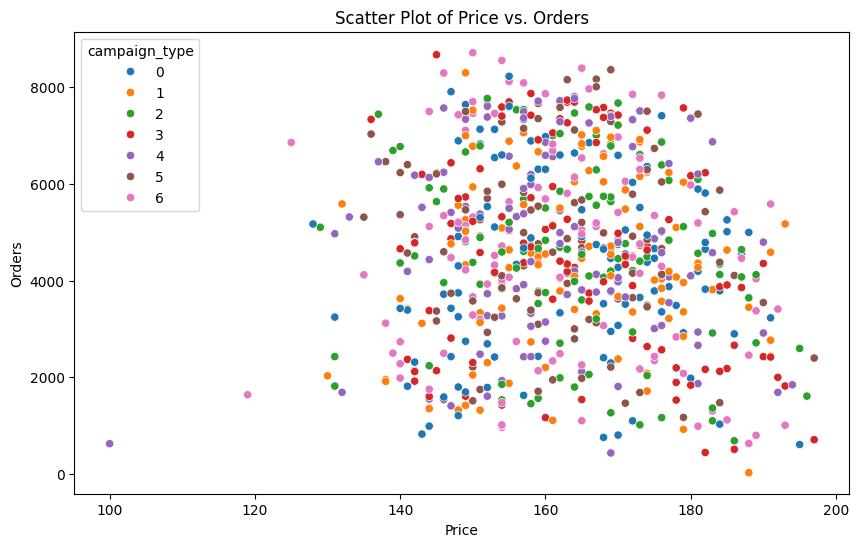

In [26]:
# Scatter plot of Price vs. Orders
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='orders', hue='campaign_type')
plt.title('Scatter Plot of Price vs. Orders')
plt.xlabel('Price')
plt.ylabel('Orders')
plt.show()

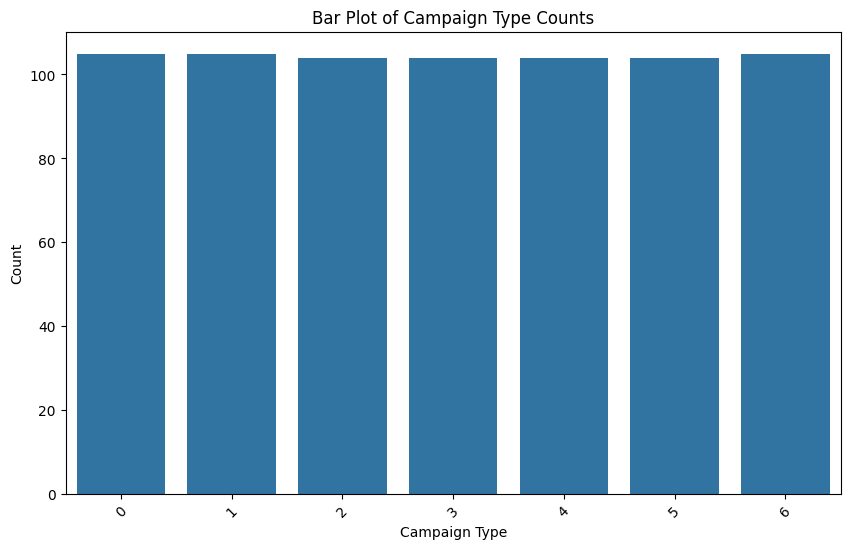

In [27]:
# Bar plot of Campaign Type counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='campaign_type')
plt.title('Bar Plot of Campaign Type Counts')
plt.xlabel('Campaign Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Line plot of Price over "Time" with Campaign Type


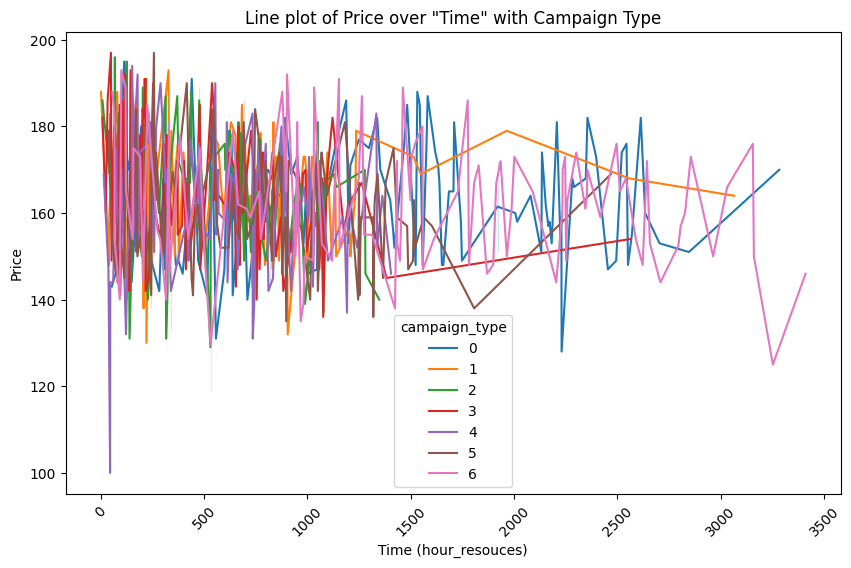

In [29]:
# Sort the dataframe by a relevant column (e.g., 'hour_resouces') to simulate 'Date'
df_sorted = df.sort_values('hour_resouces')

# Line plot of Price over 'Date' (simulated by 'hour_resouces'), with 'campaign_type' as hue
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x='hour_resouces', y='price', hue='campaign_type')
plt.title('Line plot of Price over "Time" with Campaign Type')
plt.xlabel('Time (hour_resouces)')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

**Average Orders by Campaign Type**

C:\Users\user\AppData\Local\Temp\ipykernel_9816\2718154102.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_orders = df.groupby('campaign_type')['orders'].mean().reset_index()


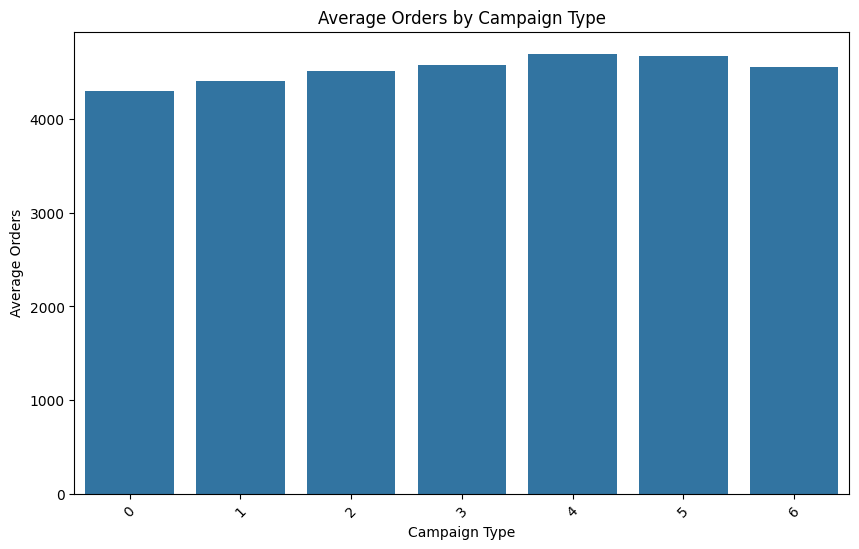

In [30]:

# Group by 'campaign_type' and calculate the average 'orders'
campaign_orders = df.groupby('campaign_type')['orders'].mean().reset_index()

# Create a bar plot using the average 'orders'
plt.figure(figsize=(10, 6))
sns.barplot(data=campaign_orders, x='campaign_type', y='orders')
plt.title('Average Orders by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Average Orders')
plt.xticks(rotation=45)
plt.show()

**Product Level Distribution by Campaign Type**

<Figure size 1000x600 with 0 Axes>

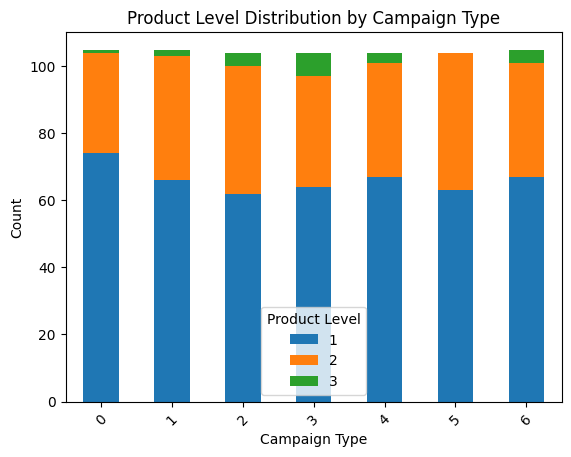

In [31]:
# Replace 'Campaign_Type' and 'Customer_Segment' with your actual column names from the dataset
segment_campaign = pd.crosstab(df['campaign_type'], df['product_level'])

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
segment_campaign.plot(kind='bar', stacked=True)
plt.title('Product Level Distribution by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Product Level')
plt.show()

# Correlation matrix

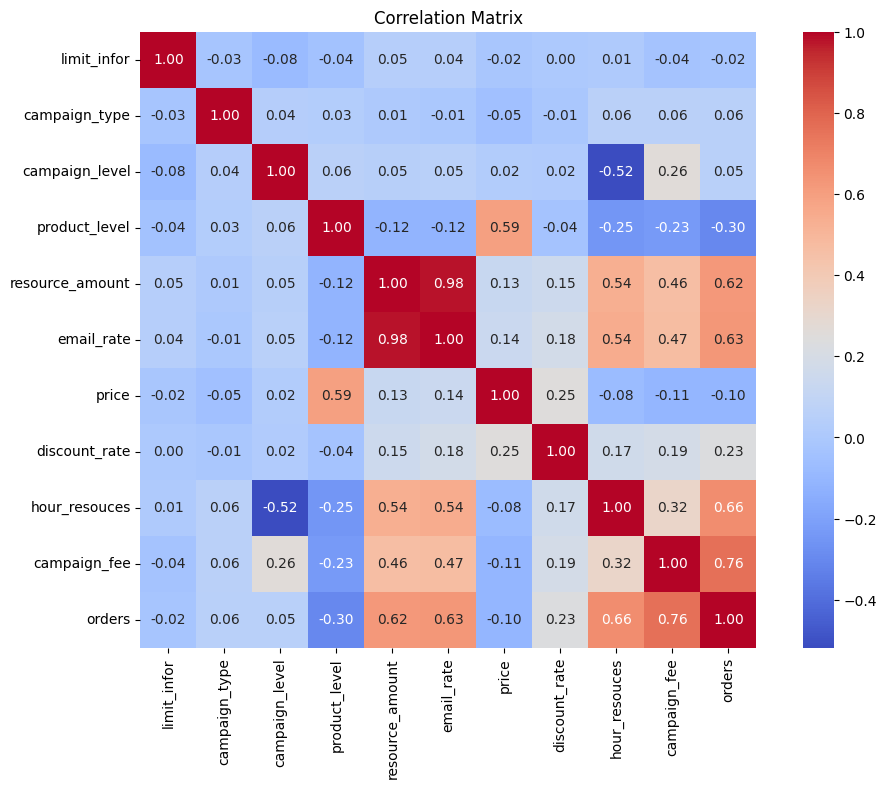

In [34]:
# Assuming you want to include specific numeric columns for correlation analysis
numeric_cols = ['limit_infor', 'campaign_type', 'campaign_level', 'product_level', 'resource_amount',
                'email_rate', 'price', 'discount_rate', 'hour_resouces', 'campaign_fee', 'orders']

# Selecting only the numeric columns
numeric_df = df[numeric_cols]

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the correlation matrix using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix')
plt.show()

# Regression Analysis

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load your dataset
df = pd.read_csv("marketing_campaign_dataset.csv")

# Remove dollar sign ('$') from 'Acquisition_Cost' if necessary
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True)

# Convert 'Acquisition_Cost' to numeric if necessary
df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'], errors='coerce')

# Identify and handle non-numeric values in 'Duration' column
# For example, replace '30 days' with NaN
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Assuming these are the correct columns in your dataset
X_columns = ['Duration', 'Clicks', 'Impressions', 'Acquisition_Cost']
y_column = 'Conversion_Rate'  # Assuming 'Conversion_Rate' is the target variable you want to predict

# Verify if the columns exist in your dataset
for col in X_columns + [y_column]:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in the dataset.")

# Prepare X and y
X = df[X_columns]
y = df[y_column]

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='median')  # Use median strategy for missing values
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.0016506019449735062
R^2 Score: -6.806983641927111e-05


c:\Users\user\Downloads\python\lib\site-packages\sklearn\impute\_base.py:597: UserWarning: Skipping features without any observed values: ['Duration']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


# Model Building

In [54]:
# Define categorical features
categorical_features = ['Campaign_Type', 'Target_Audience', 'Channel_Used', 'Location', 'Language']

# Pipeline for preprocessing categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Prepare X and y
X = df.drop(['Conversion_Rate'], axis=1)  # Features
y = df['Conversion_Rate']  # Target variable


In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [56]:
# Initialize the linear regression model
model = LinearRegression()

# Create a pipeline with preprocessing and modeling steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.0016507228054154631
R^2 Score: -0.00014129686082409165


# Conclusion💥

In this analysis, we explored the Marketing Campaign Performance Dataset and gained valuable insights into the effectiveness of various marketing campaigns. Here are the key findings from the analysis:

* **Campaign Types:** The dataset includes various campaign types such as email, social media, influencer, display, and search. Further analysis can be conducted to evaluate the performance of each campaign type and identify the most effective ones for different customer segments.

* **Target Audience:** The dataset provides information about the specific audience segments targeted by the campaigns. Understanding the preferences and characteristics of different target audiences can help in tailoring marketing strategies to effectively engage and convert potential customers.

* **Channel Usage:** The dataset includes information about the channels used to promote the campaigns, such as email, social media platforms, YouTube, websites, and Google Ads. Analyzing channel effectiveness can help in optimizing marketing efforts by focusing on the channels that generate higher conversion rates and engagement.

* **ROI and Acquisition Cost:** The ROI (Return on Investment) and acquisition cost metrics provide insights into the profitability and cost-efficiency of the campaigns. By analyzing these metrics, marketers can identify the campaigns with the highest ROI and optimize their marketing budget allocation.

* **Customer Segments:** The dataset categorizes campaigns based on specific customer segments such as tech enthusiasts, fashionistas, health and wellness enthusiasts, foodies, and outdoor adventurers. Understanding the preferences and behavior of different customer segments can aid in creating personalized and targeted marketing campaigns.

By leveraging the insights gained from this analysis, marketers and data analysts can refine their marketing strategies, optimize campaign performance, and drive targeted growth. The findings from this analysis can guide data-driven decision-making and support market research efforts.




